In [1]:
from google.colab import drive
import os
import pandas as pd
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd 'drive/MyDrive/CSCI 447. Stroke Prediction'

/content/drive/MyDrive/CSCI 447. Stroke Prediction


In [ ]:
df = pd.read_excel('data/extractedFeatures-3.0.xlsx', sheet_name=0)

In [ ]:
'''
Columns
---
Patient Number: int
Age: int
Gender: f=0, m=1
Glucocorticosteroids: 0->no,_1->predni,_2->dexa
stroke_type: 'ischemic'->0, ['hemorrhagic', 'mixed']->1
area of stroke: 'OTHER'->0, ['RMCA', 'RMCH', 'RPCA']->1, ['LMCA', 'LMCH', 'LACA', 'LPCA']->2
'''

In [ ]:
history_of_cvd = ['CHF', 'pulmonary edema', 'external drainage', 'blockade',
                   'atherosclerosis', 'infarction cerebral',
                   'cardiac dysrhythmia', 'mitral valve replacement',
                   'fibrinolysis', 'cardiosclerosis', 'ihd',
                   'secondary dilatation syndrome', 'circulatory failure',
                   'diabetes type 2', 'right sided hemipfresis',
                   'combined heart disease', 'cardiomyopathy',
                   'dyscirculatory encephalopathy', 'angina', 'chd',
                   'infarction myocardial', 'mitral defect',
                   'degenerative calcification', 'aortic defect',
                   'ischemic stroke', 'thromboembolism',
                   'rheumatic heart disease']

In [ ]:
columns = ['Patient Number', 'Age', 'Gender', 'Death (yes/no)',
           'History of IHD (yes/no)', 'History of Diabetes Mellitus (yes/no)',
           'Area of stroke', 'Arterial hypertension', 'Risk == 4', 'glascow',
           'averageBloodPresure', 'glucocorticosteroids 0->no, 1->predni, 2->dexa',
           'stroke diagnosis (ischemic/hemorrhagic) on admission',
           'History of A-Fibrillation (yes/no)', 'History of Metabolic Syndrome (yes/no)',
           'History of Chronic Renal Failure (yes/no)',
           'History of Chronic Liver Failure (yes/no)'] + history_of_cvd

In [ ]:
df = df[columns]
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.rename(columns={
    'death_(yes/no)': 'death',
    'history_of_ihd_(yes/no)': 'history_of_ihd',
    'risk_==_4': 'risk==4',
    'glucocorticosteroids_0->no,_1->predni,_2->dexa': 'glucocorticosteroids',
    'history_of_diabetes_mellitus_(yes/no)': 'history_of_diabetes',
    'glascow': 'glascow_coma_score',
    'stroke_diagnosis_(ischemic/hemorrhagic)_on_admission': 'stroke_type',
    'averagebloodpresure': 'average_blood_pressure'
})

In [ ]:
df.columns

Index(['patient_number', 'age', 'gender', 'death', 'history_of_ihd',
       'history_of_diabetes', 'area_of_stroke', 'arterial_hypertension',
       'risk==4', 'glascow_coma_score', 'averagebloodpresure',
       'glucocorticosteroids', 'stroke_type', 'chf', 'pulmonary_edema',
       'external_drainage', 'blockade', 'atherosclerosis',
       'infarction_cerebral', 'cardiac_dysrhythmia',
       'mitral_valve_replacement', 'fibrinolysis', 'cardiosclerosis', 'ihd',
       'secondary_dilatation_syndrome', 'circulatory_failure',
       'diabetes_type_2', 'right_sided_hemipfresis', 'combined_heart_disease',
       'cardiomyopathy', 'dyscirculatory_encephalopathy', 'angina', 'chd',
       'infarction_myocardial', 'mitral_defect', 'degenerative_calcification',
       'aortic_defect', 'ischemic_stroke', 'thromboembolism',
       'rheumatic_heart_disease'],
      dtype='object')

In [ ]:
cvd_columns = df.iloc[:, 13:].columns.to_list()

In [ ]:
df = df.replace('yes', 1).replace('no', 0)
df['gender'] = df['gender'].replace('f', 0).replace('m', 1)
df['stroke_type'] = df['stroke_type'].replace('ischemic', 0).replace(['hemorrhagic', 'mixed'], 1)
df['area_of_stroke'] = df['area_of_stroke'].replace('OTHER', 0).replace(['RMCA', 'RMCH', 'RPCA'], 1).replace(['LMCA', 'LMCH', 'LACA', 'LPCA'], 2)

In [ ]:
bool_columns = ['patient_number', 'death', 'history_of_ihd', 'history_of_diabetes', 'risk==4', 'glucocorticosteroids', 'arterial_hypertension', 'stroke_type'] + cvd_columns
df[bool_columns] = df[bool_columns].astype(int)

In [ ]:
df = df.drop(columns=['diabetes_type_2', 'ihd'])
df['chf'] = df['chf'] + 1

In [ ]:
def calculate_percentage_of_value_for_columns(df, value):
    '''For a dataframe calculates the percentage of zeros in each column'''
    percent_zero = (df == value).sum() * 100 / len(df)
    zero_value_df = pd.DataFrame({'percent_zero': percent_zero})
    output_series = zero_value_df.sort_values('percent_zero')
    return output_series

In [ ]:
cols_zero_perc = calculate_percentage_of_value_for_columns(df, 0)
cols_to_stay = cols_zero_perc[cols_zero_perc['percent_zero'] < 97].index.to_list()

In [ ]:
df = df[cols_to_stay]

In [ ]:
X = df.drop(columns=['death'])
y = df[['patient_number', 'death']]

In [ ]:
new_cols = ['Dias BP on admission to hospital', 'Heart Rate on admission to hospital', 'Hemiparesis on admission to hospital (yes/no/unconscious)', 'Cerebral edema on admission (yes/no)']
df_add = pd.read_excel('data/extractedFeatures-3.0.xlsx', sheet_name=0, usecols=new_cols)
df_add

,Dias BP on admission to hospital,Heart Rate on admission to hospital,Hemiparesis on admission to hospital (yes/no/unconscious),Cerebral edema on admission (yes/no)
0,100.0,140.0,yes,yes
1,110.0,88.0,yes,no
2,100.0,80.0,yes,yes
3,100.0,80.0,no,no
4,80.0,80.0,no,no
...,...,...,...,...
145,100.0,86.0,yes,yes
146,80.0,78.0,yes,no
147,60.0,108.0,no,yes
148,90.0,88.0,no,no


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
os.mkdir('data/final_dataset')

In [ ]:
df.to_csv('data/final_dataset/whole_dataset_dont_touch.csv')

In [25]:
X_train = X_train.rename(columns={'glascow_coma_score': 'glasgow_coma_score', 'average_blood_pressure':'avg_cystolic_bp',
                        'hemiparesis_on_admission_to_hospital_(yes/no/unconscious)': 'hemiparesis_on_admission_to_hospital'})
X_test = X_test.rename(columns={'glascow_coma_score': 'glasgow_coma_score', 'average_blood_pressure':'avg_cystolic_bp',
                        'hemiparesis_on_admission_to_hospital_(yes/no/unconscious)': 'hemiparesis_on_admission_to_hospital'})
X_train = X_train.drop(columns=['history_of_metabolic_syndrome_(yes/no)', 'history_of_chronic_renal_failure_(yes/no)', 'history_of_a-fibrillation_(yes/no)'])
X_test = X_test.drop(columns=['history_of_metabolic_syndrome_(yes/no)', 'history_of_chronic_renal_failure_(yes/no)', 'history_of_a-fibrillation_(yes/no)'])
X_train.columns

Index(['glasgow_coma_score', 'avg_cystolic_bp', 'age', 'arterial_hypertension',
       'risk==4', 'area_of_stroke', 'gender', 'chf', 'stroke_type',
       'history_of_ihd', 'cardiac_dysrhythmia', 'glucocorticosteroids',
       'cardiosclerosis', 'history_of_a-fibrillation', 'history_of_diabetes',
       'history_of_chronic_renal_failure', 'chd',
       'history_of_metabolic_syndrome', 'rheumatic_heart_disease',
       'atherosclerosis', 'circulatory_failure',
       'dias_bp_on_admission_to_hospital',
       'heart_rate_on_admission_to_hospital',
       'hemiparesis_on_admission_to_hospital', 'cerebral_edema_on_admission'],
      dtype='object')

In [28]:
X_train

,glasgow_coma_score,avg_cystolic_bp,age,arterial_hypertension,risk==4,area_of_stroke,gender,chf,stroke_type,history_of_ihd,...,history_of_chronic_renal_failure,chd,history_of_metabolic_syndrome,rheumatic_heart_disease,atherosclerosis,circulatory_failure,dias_bp_on_admission_to_hospital,heart_rate_on_admission_to_hospital,hemiparesis_on_admission_to_hospital,cerebral_edema_on_admission
patient_number,,,,,,,,,,,,,,,,,,,,,
23.0,7.400000,186.666667,60.0,3.0,1.0,2,0,3.0,0,0,...,0,0.0,0,0.0,0.0,0.0,100,68,1,0
16.0,14.750000,141.000000,17.0,0.0,0.0,1,1,0.0,1,0,...,0,0.0,0,0.0,0.0,0.0,90,74,1,1
66.0,6.100000,119.777778,58.0,3.0,1.0,0,1,3.0,0,1,...,1,0.0,0,0.0,0.0,0.0,95,130,1,1
12.0,13.266667,176.250000,41.0,1.0,1.0,1,1,2.0,1,0,...,0,0.0,0,0.0,0.0,0.0,130,100,1,1
43.0,4.000000,193.333333,36.0,3.0,1.0,0,0,3.0,1,1,...,1,1.0,0,1.0,0.0,0.0,120,96,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72.0,11.750000,140.833333,87.0,2.0,1.0,0,1,3.0,0,1,...,0,0.0,0,0.0,0.0,0.0,100,80,0,1
107.0,11.508772,146.182692,51.0,2.0,1.0,1,0,0.0,0,0,...,0,0.0,0,0.0,0.0,0.0,80,82,1,0
15.0,14.333333,143.888889,54.0,1.0,1.0,2,0,0.0,1,1,...,0,0.0,0,0.0,0.0,0.0,90,72,0,1


In [ ]:
X_train = X_train.set_index('patient_number')
X_test = X_test.set_index('patient_number')
y_train = y_train.set_index('patient_number')
y_test = y_test.set_index('patient_number')

In [29]:
X_train.to_csv('data/final_dataset/X_train.csv')
X_test.to_csv('data/final_dataset/X_test.csv')
y_train.to_csv('data/final_dataset/y_train.csv')
y_test.to_csv('data/final_dataset/y_test.csv')

In [ ]:
calculate_percentage_of_value_for_columns(y_test[['death']], 0)

,percent_zero
death,60.0


### Adding new features (very risky)

In [ ]:
# First wave
new_cols = ['History of A-Fibrillation (yes/no)', 'History of Metabolic Syndrome (yes/no)', 'History of Chronic Renal Failure (yes/no)', 'History of Chronic Liver Failure (yes/no)']
df_add = pd.read_excel('data/extractedFeatures-3.0.xlsx', sheet_name=0)
df_add = df_add[new_cols]
df_add.loc[df_add.iloc[:, 0] == 'not determined', 'Dias BP on admission to hospital'] = 95
df_add.iloc[:, 2] = df_add.iloc[:, 2].replace(list(df_add.iloc[:, 2].unique())[-3:], 1)
df_add = df_add.replace('yes', 1).replace('no', 0)
df_add = df_add.fillna(0)
df_add = df_add.astype(int)
df_add.columns = df_add.columns.str.lower().str.replace(' (yes/no)', '', regex=False).str.replace(' ', '_')
X[df_add.columns] = df_add  # if you still have old X

X = X.set_index('patient_number')  # if not set previously
train_inds = X_train.index.to_list()
test_inds = X_test.index.to_list()
X_train = X.loc[train_inds, :]
X_test = X.loc[test_inds, :]

#and then save updated to csv

In [3]:
X_train = pd.read_csv('data/final_dataset/X_train.csv')
X_test = pd.read_csv('data/final_dataset/X_test.csv')
y_train = pd.read_csv('data/final_dataset/y_train.csv')
y_test = pd.read_csv('data/final_dataset/y_test.csv')

X_train = X_train.set_index('patient_number')
X_test = X_test.set_index('patient_number')
y_train = y_train.set_index('patient_number')
y_test = y_test.set_index('patient_number')

In [30]:
# Second wave
df_add = pd.read_excel('data/extractedFeatures-3.0.xlsx', sheet_name=0)
new_feature = df_add[['Patient Number', 'Anticoagulants, antiplatelet in ICU (yes/no)']]
new_feature.columns = new_feature.columns.str.replace(' (yes/no)', '', regex=False).str.replace(',', '').str.replace(' ', '_').str.lower()
new_feature = new_feature.set_index('patient_number')

def quick_editor(row):
    if type(row) != float and 'yes' in row:
        return 1
    return 0

new_feature = new_feature.iloc[:, 0].apply(quick_editor)
train_inds = X_train.index.to_list()
test_inds = X_test.index.to_list()
X_train_add = pd.concat([X_train, new_feature[train_inds]], axis=1)
X_test_add = pd.concat([X_test, new_feature[test_inds]], axis=1)


## Training models

In [65]:
import graphviz

In [6]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [ ]:
X_train = pd.read_csv('data/final_dataset/X_train.csv')
X_test = pd.read_csv('data/final_dataset/X_test.csv')
y_train = pd.read_csv('data/final_dataset/y_train.csv')
y_test = pd.read_csv('data/final_dataset/y_test.csv')

In [8]:
X_train = X_train.set_index('patient_number')
X_test = X_test.set_index('patient_number')
y_train = y_train.set_index('patient_number')
y_test = y_test.set_index('patient_number')

In [ ]:
def run_trial(clf, X_train, y_train, cv=10):
    cross_val_res = cross_val_score(clf, X_train, y_train, cv=cv)
    print(cross_val_res)
    feature_names = X_train.columns.to_list()
    class_names = clf.classes_.astype(str).tolist()
    # print tree in text
    text_tree = tree.export_text(clf, feature_names=feature_names)
    print(text_tree)
    return clf, cross_val_res, text_tree

In [ ]:
y_train

,death
patient_number,
23,0
16,0
66,1
12,0
43,1
...,...
72,0
107,0
15,0


In [67]:
clf = tree.DecisionTreeClassifier(
                                    max_depth=4,  # most adequate values 2, 3, 4 (useful to compare with 1)
                                    min_samples_split=5,  # chose as optimal
                                    ccp_alpha = 0.005,  # tree pruning, interesting to play with
                                    splitter='random'  # choose different best splits
                                 )
cross_val_res = cross_val_score(clf, X_train, y_train, cv=8)
print(cross_val_res.mean())
# clf, feature_names, class_names, text_tree = run_trial(clf, X_train, y_train)
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
feature_names = X_train.columns.to_list()
class_names = clf.classes_.astype(str).tolist()
# print tree in text
text_tree = tree.export_text(clf, feature_names=feature_names)
print(text_tree)

0.7416666666666667
0.6666666666666666
|--- glasgow_coma_score <= 12.38
|   |--- history_of_chronic_renal_failure <= 0.96
|   |   |--- glasgow_coma_score <= 10.01
|   |   |   |--- avg_cystolic_bp <= 172.04
|   |   |   |   |--- class: 1
|   |   |   |--- avg_cystolic_bp >  172.04
|   |   |   |   |--- class: 0
|   |   |--- glasgow_coma_score >  10.01
|   |   |   |--- chd <= 0.27
|   |   |   |   |--- class: 0
|   |   |   |--- chd >  0.27
|   |   |   |   |--- class: 1
|   |--- history_of_chronic_renal_failure >  0.96
|   |   |--- glasgow_coma_score <= 10.68
|   |   |   |--- class: 1
|   |   |--- glasgow_coma_score >  10.68
|   |   |   |--- class: 0
|--- glasgow_coma_score >  12.38
|   |--- class: 0



In [ ]:
# results
run_dt_1 = {'max_depth=5', 'min_samples_split=4', 'ccp_alpha=0.015',
 "splitter='random'", 'cv=8', 'train=0.78', 'test=0.73'}
run_rf_1 = {
     'max_depth=3', 'n_estimators=20', 'max_features=5', 'ccp_alpha=0.01'
}

In [23]:
X_train_add.columns

Index(['glascow_coma_score', 'average_blood_pressure', 'age',
       'arterial_hypertension', 'risk==4', 'area_of_stroke', 'gender', 'chf',
       'stroke_type', 'history_of_ihd', 'cardiac_dysrhythmia',
       'glucocorticosteroids', 'cardiosclerosis', 'history_of_a-fibrillation',
       'history_of_a-fibrillation_(yes/no)', 'history_of_diabetes',
       'history_of_chronic_renal_failure_(yes/no)',
       'history_of_chronic_renal_failure', 'chd',
       'history_of_metabolic_syndrome_(yes/no)',
       'history_of_metabolic_syndrome', 'rheumatic_heart_disease',
       'atherosclerosis', 'circulatory_failure',
       'dias_bp_on_admission_to_hospital',
       'heart_rate_on_admission_to_hospital',
       'hemiparesis_on_admission_to_hospital_(yes/no/unconscious)',
       'cerebral_edema_on_admission', 'anticoagulants_antiplatelet_in_icu'],
      dtype='object')

In [31]:
random_state = 83
rf_clf = RandomForestClassifier(max_depth=3, n_estimators=16, max_features=6, min_samples_split=3,
                                min_impurity_decrease=0.005, random_state=random_state)
rf_clf = rf_clf.fit(X_train_add, y_train)
print(rf_clf.score(X_train_add, y_train))
print(rf_clf.score(X_test_add, y_test))

0.8833333333333333
0.8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
preds = rf_clf.predict(X_test_add)
print(classification_report(y_test, preds))
report = classification_report(y_test, preds, output_dict=True)
results['rf_best'] = {'report': report, 'params': rf_clf.get_params()}
# report = pd.DataFrame(report).transpose()

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.80      0.67      0.73        12

    accuracy                           0.80        30
   macro avg       0.80      0.78      0.78        30
weighted avg       0.80      0.80      0.80        30



In [37]:
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [55]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=8)
split_thresholds = []
for train, val in kf.split(X_train_add):
    X_train_add_split, X_val, y_train_split, y_val = X_train_add.loc[train, :], X_train_add.loc[val, :], y_train.loc[train, :], y_train.loc[val, :]
    y_train_np = np.zeros([105, 2])
    y_train_np[:, 0] = (y_train_split['death'] == 0).astype(int).to_numpy()
    y_train_np[:, 1] = y_train_split['death'].to_numpy()

    preds = rf_clf.predict_proba(X_train_add_split)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_train_np[:, i], preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], thresholds = roc_curve(y_train_np.ravel(), preds.ravel())
    
    preds = rf_clf.predict_proba(X_val)
    lst = []
    for threshold in thresholds:
        preds_thresh = (preds[:, 1] >= threshold).astype(int)
        acc = accuracy_score(y_val, preds_thresh)
        lst.append(acc)
    indmax = np.array(lst).argmax()
    split_thresholds.append(thresholds[indmax])

In [62]:
os.mkdir('data/figures')

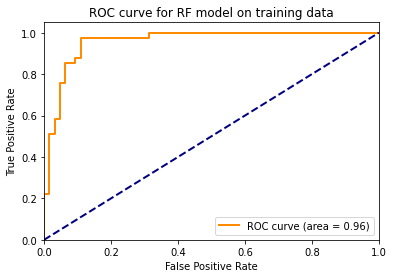

In [63]:
plt.figure()
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for RF model on training data")
plt.legend(loc="lower right")
plt.savefig('rf_roc_curve.png')
plt.show()

In [51]:
# preds = rf_clf.predict_proba(X_test_add)
lst = []
for threshold in thresholds:
    preds_thresh = (preds[:, 1] >= threshold).astype(int)
    acc = accuracy_score(y_test, preds_thresh)
    lst.append(acc)
indmax = np.array(lst).argmax()
thresholds[indmax]

0.47994486333991

In [59]:
preds = rf_clf.predict_proba(X_test_add)
preds_thresh = (preds[:, 1] >= np.array(split_thresholds).mean()).astype(int)
print(classification_report(y_test['death'], preds_thresh), save)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.90      0.75      0.82        12

    accuracy                           0.87        30
   macro avg       0.88      0.85      0.86        30
weighted avg       0.87      0.87      0.86        30



In [ ]:
results

{'dt_best': {'params': {'ccp_alpha': 0.005,
   'class_weight': None,
   'criterion': 'gini',
   'max_depth': 4,
   'max_features': None,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_samples_leaf': 1,
   'min_samples_split': 5,
   'min_weight_fraction_leaf': 0.0,
   'random_state': None,
   'splitter': 'random'},
  'report': {'0': {'f1-score': 0.7999999999999999,
    'precision': 0.8235294117647058,
    'recall': 0.7777777777777778,
    'support': 18},
   '1': {'f1-score': 0.7199999999999999,
    'precision': 0.6923076923076923,
    'recall': 0.75,
    'support': 12},
   'accuracy': 0.7666666666666667,
   'macro avg': {'f1-score': 0.7599999999999999,
    'precision': 0.7579185520361991,
    'recall': 0.7638888888888888,
    'support': 30},
   'weighted avg': {'f1-score': 0.768,
    'precision': 0.7710407239819003,
    'recall': 0.7666666666666667,
    'support': 30}}},
 'rf_best': {'params': {'bootstrap': True,
   'ccp_alpha': 0.0,
   'class_weight': None,
   'cri

In [103]:
pd.DataFrame(rf_clf.feature_importances_, index=rf_clf.feature_names_in_).sort_values(0, ascending=False).to_csv('data/rf_features_importances_table.csv')

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(
    rf_clf, X_test_add, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

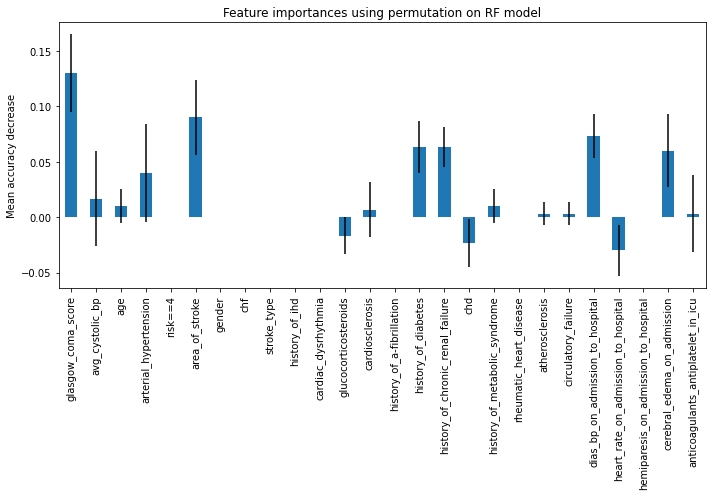

In [100]:
fig, ax = plt.subplots(figsize=(10, 7))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on RF model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.savefig('data/figures/rf_feature_importances.png')
plt.show()

In [ ]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 6,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.005,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 16,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Training on added features

In [91]:
clf = tree.DecisionTreeClassifier(
                                    max_depth=4,  # most adequate values 2, 3, 4 (useful to compare with 1)
                                    min_samples_split=5,  # chose as optimal
                                    ccp_alpha = 0.005,  # tree pruning, interesting to play with
                                    splitter='random'  # choose different best splits
                                 )
cross_val_res = cross_val_score(clf, X_train_add, y_train, cv=8)
print(cross_val_res.mean())
# clf, feature_names, class_names, text_tree = run_trial(clf, X_train, y_train)
clf = clf.fit(X_train_add, y_train)
print(clf.score(X_test_add, y_test))
feature_names = X_train_add.columns.to_list()
class_names = clf.classes_.astype(str).tolist()
# print tree in text
text_tree = tree.export_text(clf, feature_names=feature_names)
print(text_tree)

0.7583333333333333
0.7666666666666667
|--- glasgow_coma_score <= 5.95
|   |--- heart_rate_on_admission_to_hospital <= 79.84
|   |   |--- anticoagulants_antiplatelet_in_icu <= 0.01
|   |   |   |--- gender <= 0.14
|   |   |   |   |--- class: 1
|   |   |   |--- gender >  0.14
|   |   |   |   |--- class: 0
|   |   |--- anticoagulants_antiplatelet_in_icu >  0.01
|   |   |   |--- class: 0
|   |--- heart_rate_on_admission_to_hospital >  79.84
|   |   |--- class: 1
|--- glasgow_coma_score >  5.95
|   |--- glasgow_coma_score <= 12.18
|   |   |--- glasgow_coma_score <= 11.34
|   |   |   |--- history_of_diabetes <= 0.00
|   |   |   |   |--- class: 1
|   |   |   |--- history_of_diabetes >  0.00
|   |   |   |   |--- class: 0
|   |   |--- glasgow_coma_score >  11.34
|   |   |   |--- chd <= 0.25
|   |   |   |   |--- class: 0
|   |   |   |--- chd >  0.25
|   |   |   |   |--- class: 1
|   |--- glasgow_coma_score >  12.18
|   |   |--- class: 0



In [92]:
def save_graphviz_tree(clf, name, feature_names, class_names):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph

In [94]:
name = 'dt_best'
graph = save_graphviz_tree(clf, name, feature_names, class_names)
graph.render(name, format='pdf')

'dt_best.pdf'

In [ ]:
preds = clf.predict(X_test_add)
print(classification_report(y_test, preds))
report = classification_report(y_test, preds, output_dict=True)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.69      0.75      0.72        12

    accuracy                           0.77        30
   macro avg       0.76      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30



In [ ]:
results = {}

In [ ]:
clf.get_params()

{'ccp_alpha': 0.005,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'random'}

In [ ]:
results['dt_best'] = {'report': report, 'params': clf.get_params()}
results

{'dt_best': {'params': {'ccp_alpha': 0.005,
   'class_weight': None,
   'criterion': 'gini',
   'max_depth': 4,
   'max_features': None,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_samples_leaf': 1,
   'min_samples_split': 5,
   'min_weight_fraction_leaf': 0.0,
   'random_state': None,
   'splitter': 'random'},
  'report': {'0': {'f1-score': 0.7999999999999999,
    'precision': 0.8235294117647058,
    'recall': 0.7777777777777778,
    'support': 18},
   '1': {'f1-score': 0.7199999999999999,
    'precision': 0.6923076923076923,
    'recall': 0.75,
    'support': 12},
   'accuracy': 0.7666666666666667,
   'macro avg': {'f1-score': 0.7599999999999999,
    'precision': 0.7579185520361991,
    'recall': 0.7638888888888888,
    'support': 30},
   'weighted avg': {'f1-score': 0.768,
    'precision': 0.7710407239819003,
    'recall': 0.7666666666666667,
    'support': 30}}}}

In [ ]:
report = pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.823529,0.777778,0.800000,18.000000
1,0.692308,0.750000,0.720000,12.000000
accuracy,0.766667,0.766667,0.766667,0.766667
macro avg,0.757919,0.763889,0.760000,30.000000
weighted avg,0.771041,0.766667,0.768000,30.000000


In [ ]:
tree.DecisionTreeClassifier()